In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
a = np.array ([0.4000, 0.4439])
b = np.array ([0.2439, 0.1463])
c = np.array ([0.1707, 0.2293])
d = np.array ([0.2293, 0.7610])
e = np.array ([0.5171, 0.9414])
f = np.array ([0.8732, 0.6536])
g = np.array ([0.6878, 0.5219])
h = np.array ([0.8488, 0.3609])
i = np.array ([0.6683, 0.2536])
j = np.array ([0.6195, 0.2634])

patterns = [a, b, c, d, e, f, g, h, i, j]
# patterns = [a1, b1, c1, d1, e1, j1, k1, a2, b2, c2, d2, e2, j2, k2, a3, b3, c3, d3, e3, j3, k3 ]
names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [29]:
def generate_random_weights (signal_tuple_count , cluster_count):
    W = np.random.random_sample( size = (signal_tuple_count, cluster_count))
    b = -1
    W = b * W +1
    return W

In [5]:
def find_closest_cluster(sample, W):
    # sample should be in 1D
    sample = np.reshape(sample, (1,sample.size))[0]
    D = []
    col_count = W.shape[1]
    row_count = W.shape[0]
    for j in range(col_count):
        # j ranging from 0 to col_count-1
        d = (sample[0]-W[0][j])**2 + (sample[1]-W[1][j])**2
        D = np.append(D, d)
    # now D is filled properly
    return np.argmin(D)

In [6]:
def update_weights (W, j, sample):
    col_count = W.shape[1]
    row_count = W.shape[0]
    for i in range(row_count):
        W[i][j] = W[i][j] + alpha*(sample[i] - W[i][j])
    return W

In [7]:
def update_weights_linear (W, j, sample):
    col_count = W.shape[1]
    row_count = W.shape[0]
    if j == 0:
        W = update_weights(W, j, sample)
        W = update_weights(W, j+1, sample)
        W = update_weights(W, col_count-1, sample)
    elif j == col_count-1:
        W = update_weights(W, j, sample)
        W = update_weights(W, j-1, sample)
        W = update_weights(W, 0, sample)
    else:
        W = update_weights(W, j, sample)
        W = update_weights(W, j-1, sample)
        W = update_weights(W, j+1, sample)
    return W

In [8]:
def update_weights_diamond (W, j, sample):
    col_count = W.shape[1]
    row_count = W.shape[0]

    left, right, up, down = get_diamond_neighbours(j)
    if (left >= 0 and left < col_count):
        W = update_weights(W, left, sample)
        
    if (right >= 0 and right < col_count):
        W = update_weights(W, right, sample) 
    
    if (down >= 0 and down < col_count):
        W = update_weights(W, down, sample)
        
    if (up >= 0 and up < col_count):
        W = update_weights(W, up, sample)

    return W

In [9]:
def get_row_coordinate(j):
    return math.floor(j/dim)
def get_col_coordinate(j):
    return j%dim

In [10]:
def get_diamond_neighbours(j):
    dim = 5 #clusters are organized as a 5*5 grid
    left = j-1
    right = j+1
    up = j - dim
    down = j + dim
    if (get_row_coordinate(left) != get_row_coordinate(j)):
        left = -1
    if (get_row_coordinate(right) != get_row_coordinate(j)):
        right = -1
    if (get_col_coordinate(up) != get_col_coordinate(j)):
        up = -1
    if (get_col_coordinate(down) != get_col_coordinate(j)):
        down = -1
    return left, right, up, down

In [11]:
def train_one_sample(sample, W, topology):
    sample = np.array(sample)
    sample = np.reshape(sample, (1,sample.size))[0]
    j = find_closest_cluster(sample, W)
    if topology == 'none':
        W = update_weights(W, j, sample)
    elif topology == 'linear':
        W = update_weights_linear(W, j, sample)
    elif topology == 'diamond':
        W = update_weights_diamond(W, j, sample)
    return W

In [54]:
def train(samples, signal_tuple_count, cluster_count, iterations, topology1, topology2, interval):
    alpha = 0.6
    # generating W matrix randomly
    W = generate_random_weights(signal_tuple_count, cluster_count)
    
    for i in range(iterations):# iterate over epochs
        for j in range(len(samples)):# iterate over samples
            sample = samples[j]
            W = train_one_sample(sample, W, topology1)
        # reducing the learning rate
        alpha = 0.3 * alpha
        if i % interval == 0:
            show_plot(W, samples, i)
    for i in range(iterations):# iterate over epochs
        for j in range(len(samples)):# iterate over samples
            sample = samples[j]
            W = train_one_sample(sample, W, topology2)
        # reducing the learning rate
        alpha = 0.5 * alpha
        if i % interval == 0:
            show_plot(W, samples, i+iterations)
    show_plot(W, samples, i+iterations)
    return W

In [27]:
def show_plot(W, patterns, iteration_num):
    plt.figure()
    x, y = W
    plt.plot(x,y)
    for sample in patterns:
        plt.plot(sample[0], sample[1],'x')
    plt.title('iteration {}'.format(iteration_num))

array([[0.788425  , 0.68866218, 0.6378    , 0.52142206, 0.2439    ,
        0.1707    , 0.4       , 0.2293    , 0.5171    , 0.8732    ],
       [0.421275  , 0.32222457, 0.259725  , 0.24343235, 0.1463    ,
        0.2293    , 0.4439    , 0.761     , 0.9414    , 0.6536    ]])

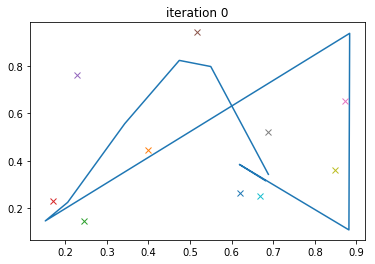

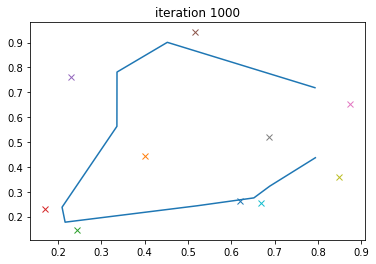

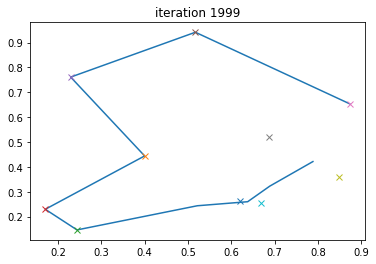

In [58]:
alpha = 0.4
dim = 5
fW = train(patterns, 2, 10, 1000, 'linear','none',2000)
fW